In [1]:
import os
os.listdir('sample_data')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Salary .csv to Salary .csv


In [3]:
df = pd.read_csv('Salary .csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [5]:
df.shape

(6684, 9)

In [6]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [7]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [8]:
df1.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


In [9]:
df.duplicated().sum()

1536

In [10]:
df.drop_duplicates(inplace = True)
df.shape

(5148, 9)

In [11]:
for column in df1:
    print(f"{column} - {len(df1[column].unique())} : {df1[column].unique()}")

Age - 41 : [32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. 61. 57. 62. 55. 56.
 54. 60. 58. 22. 21.]
Gender - 2 : ['Male' 'Female']
Education Level - 4 : [1 2 3 0]
Job Title - 129 : ['Software Engineer' 'Data Analyst' 'Manager' 'Sales Associate' 'Director'
 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Scientist' 'Software Developer' 'HR Manager'
 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Engineer' 'Data Entry Clerk'
 'Sales Director' 'Business Analyst' 'VP of Operations' 'IT Support'
 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Developer' 'Consultant' 'Product Designer' 'CEO'
 'Accountant' 'Data Scientist' 'Marketing Specialist' 'Technical Writer'
 'HR Generalist' 'Project Engineer' 'Customer Success Rep'
 'Sales Executive' 'UX Designer' 'Operations Director' 'Network Engineer'
 

Text(0.5, 1.0, 'Distributions')

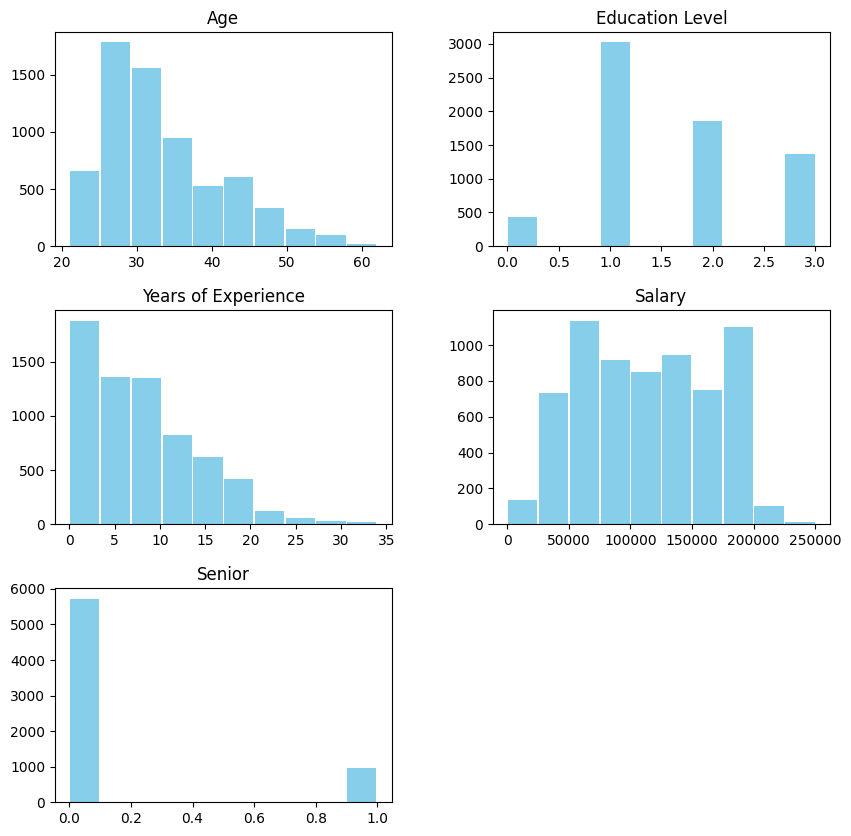

In [12]:
df1.hist(figsize = (10, 10), rwidth = 0.95, color = "skyblue", grid = False)
plt.title("Distributions")

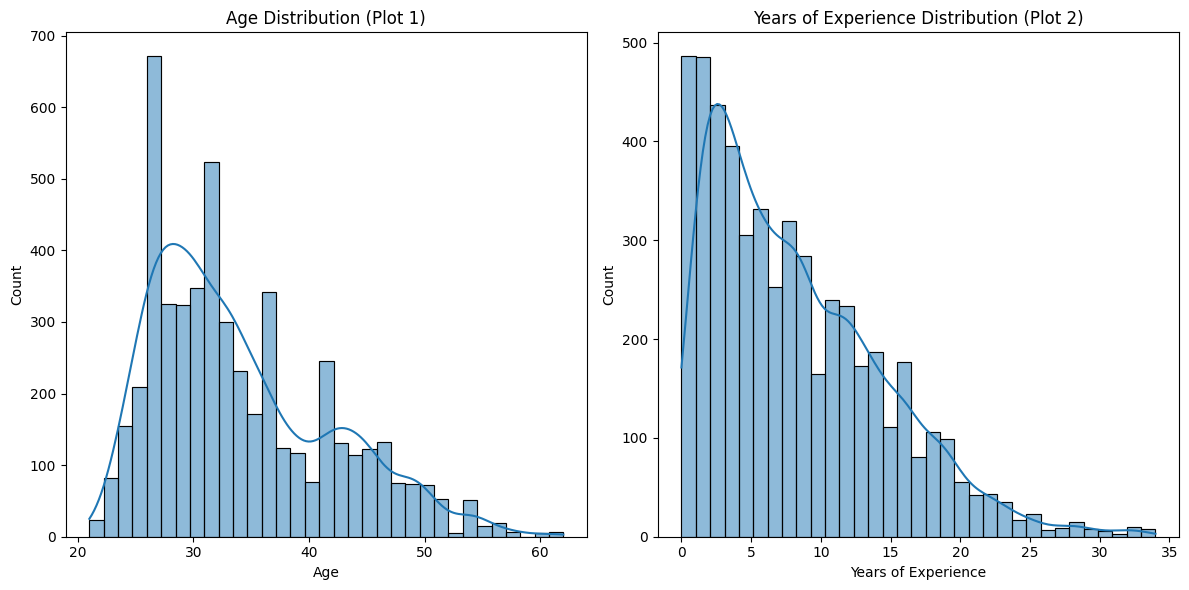

In [13]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution (Plot 1)")

sns.histplot(df["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution (Plot 2)")

plt.tight_layout()

plt.show()

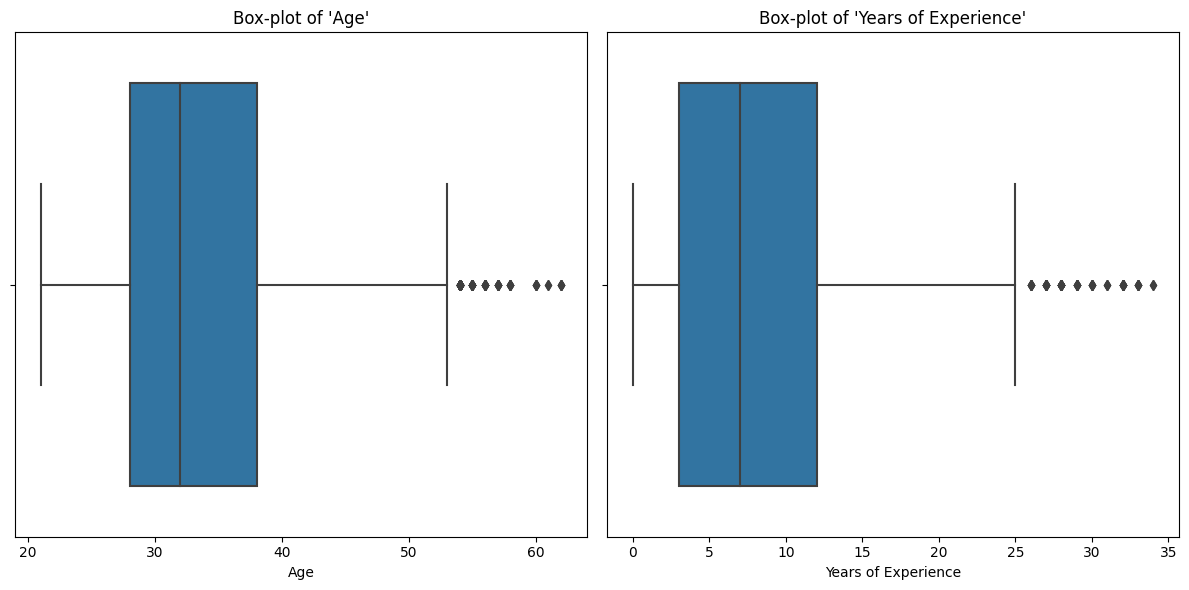

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=df1["Age"], ax=axes[0])
axes[0].set_title("Box-plot of 'Age'")

sns.boxplot(x=df1["Years of Experience"], ax=axes[1])
axes[1].set_title("Box-plot of 'Years of Experience'")

plt.tight_layout()

plt.show()

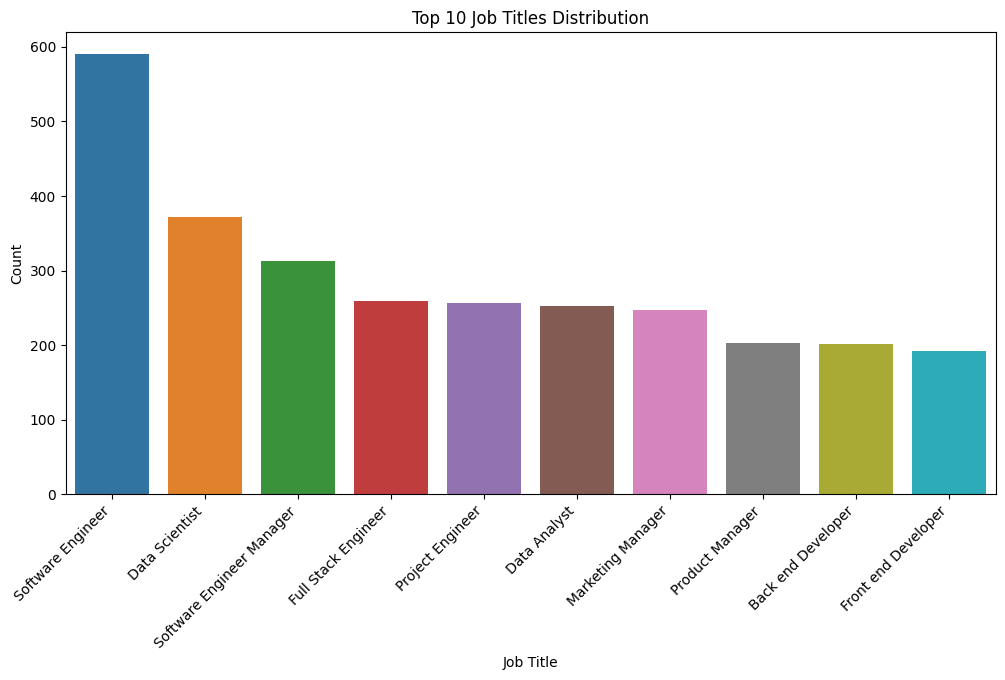

In [26]:
plt.figure(figsize=(12, 6))
top_job_titles = df['Job Title'].value_counts().nlargest(10).index
sns.countplot(x='Job Title', data=df, order=top_job_titles)
plt.title('Top 10 Job Titles Distribution')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

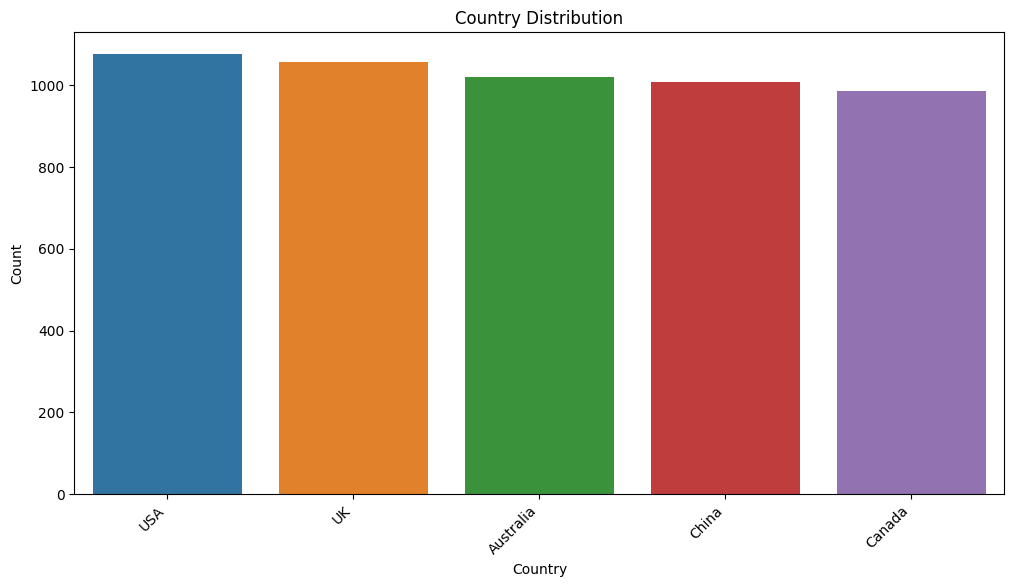

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
def outliers(attr):
    Q1 = df1[attr].quantile(0.25)
    Q2 = df1[attr].quantile(0.5)
    Q3 = df1[attr].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return df1[(df1[attr] < lower_bound) | (df1[attr]>upper_bound)]

In [16]:
outliers("Age")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
1209,61.0,Male,3,Software Engineer Manager,20.0,200000.0,UK,Welsh,0
1221,57.0,Male,3,Software Engineer Manager,18.0,195000.0,China,White,0
1223,62.0,Male,3,Software Engineer Manager,19.0,200000.0,UK,White,0
1234,62.0,Male,3,Software Engineer Manager,20.0,200000.0,China,Korean,0
1238,55.0,Male,3,Software Engineer Manager,17.0,190000.0,USA,African American,0
...,...,...,...,...,...,...,...,...,...
3041,54.0,Male,2,Software Engineer,32.0,195270.0,Canada,Asian,1
3050,54.0,Male,1,Full Stack Engineer,25.0,179756.0,UK,Mixed,0
3067,54.0,Female,3,Software Engineer Manager,32.0,191510.0,China,Chinese,0
3087,54.0,Male,3,Software Engineer Manager,30.0,184660.0,Australia,Australian,0


In [17]:
outliers("Age")["Gender"].value_counts(), outliers("Age")["Job Title"].value_counts()

(Male      92
 Female    27
 Name: Gender, dtype: int64,
 Software Engineer Manager    92
 Full Stack Engineer          13
 Software Engineer             7
 Project Engineer              7
 Name: Job Title, dtype: int64)

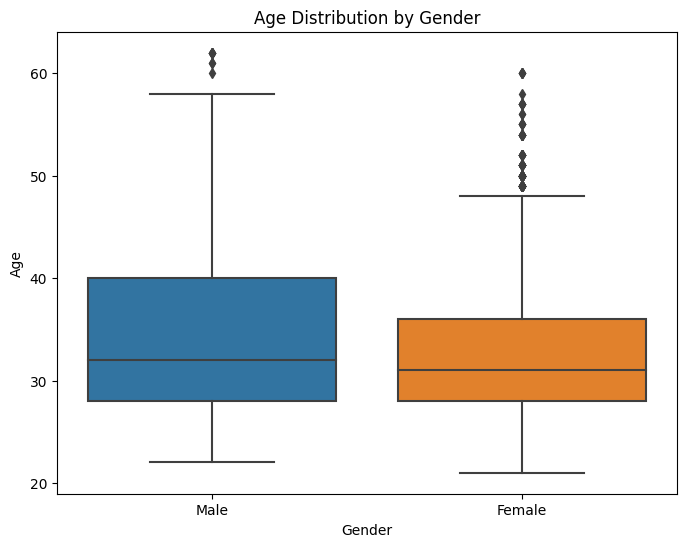

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x="Gender", y="Age")
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.show()

In [19]:
outliers("Years of Experience")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
2382,57.0,Female,3,Full Stack Engineer,30.0,121450.0,Australia,Australian,0
2387,52.0,Female,2,Software Engineer,28.0,186963.0,Australia,Australian,1
2391,60.0,Female,3,Software Engineer Manager,33.0,179180.0,China,White,0
2393,58.0,Male,2,Software Engineer,27.0,190004.0,China,White,1
2396,57.0,Female,3,Software Engineer Manager,33.0,191790.0,China,Korean,0
...,...,...,...,...,...,...,...,...,...
3059,52.0,Male,3,Software Engineer Manager,26.0,185982.0,Canada,Asian,0
3067,54.0,Female,3,Software Engineer Manager,32.0,191510.0,China,Chinese,0
3087,54.0,Male,3,Software Engineer Manager,30.0,184660.0,Australia,Australian,0
3103,54.0,Male,3,Software Engineer Manager,28.0,182013.0,USA,African American,0


In [20]:
df2 = pd.get_dummies(df1, columns = ["Gender", "Education Level", "Job Title", "Country", "Race"])
df2.head()

,Age,Years of Experience,Salary,Senior,Gender_Female,Gender_Male,Education Level_0,Education Level_1,Education Level_2,Education Level_3,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,90000.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.0,3.0,65000.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,36.0,7.0,60000.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52.0,20.0,200000.0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_need_scaling = ["Age", "Years of Experience"]
df2[columns_need_scaling] = scaler.fit_transform(df2[columns_need_scaling])
df2.head()

,Age,Years of Experience,Salary,Senior,Gender_Female,Gender_Male,Education Level_0,Education Level_1,Education Level_2,Education Level_3,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,-0.212044,-0.510499,90000.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.738676,-0.842237,65000.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.499513,1.148191,150000.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.314589,-0.178761,60000.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.421120,1.977536,200000.0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Gender Distribution')

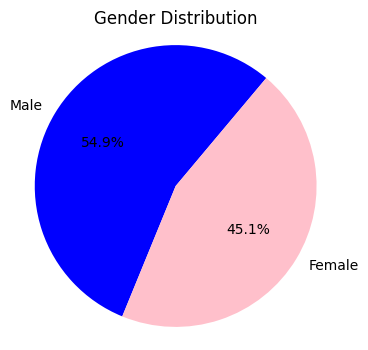

In [22]:
male_count = df2["Gender_Male"].sum()
female_count = df2["Gender_Female"].sum()
labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["blue", 'pink']

plt.figure(figsize = (4, 4))
plt.pie(sizes, labels = labels, colors = colors, startangle = 50, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Gender Distribution")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

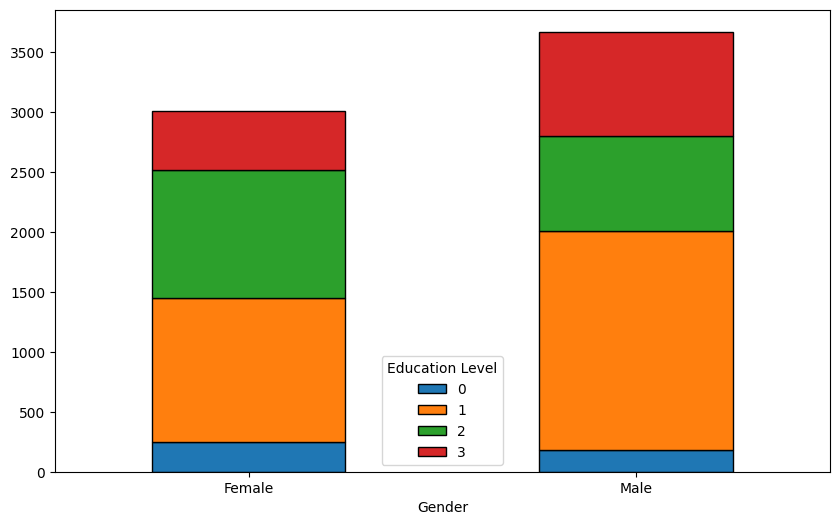

In [23]:
table = pd.crosstab(index = df1["Gender"], columns = df1["Education Level"])
table.plot(kind="bar",figsize = (10, 6), stacked=True, edgecolor = "black")
plt.xticks(rotation = 0)

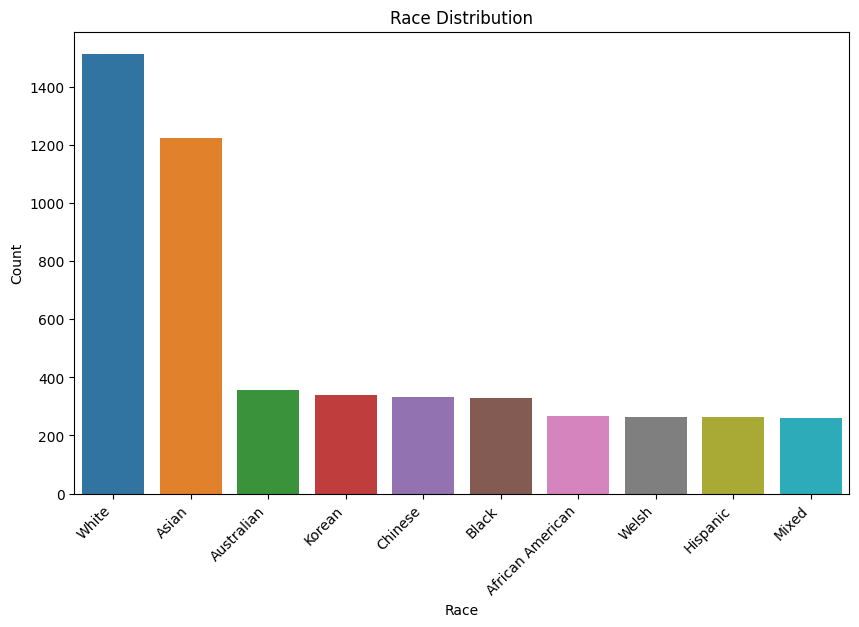

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race', data=df, order=df['Race'].value_counts().index)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

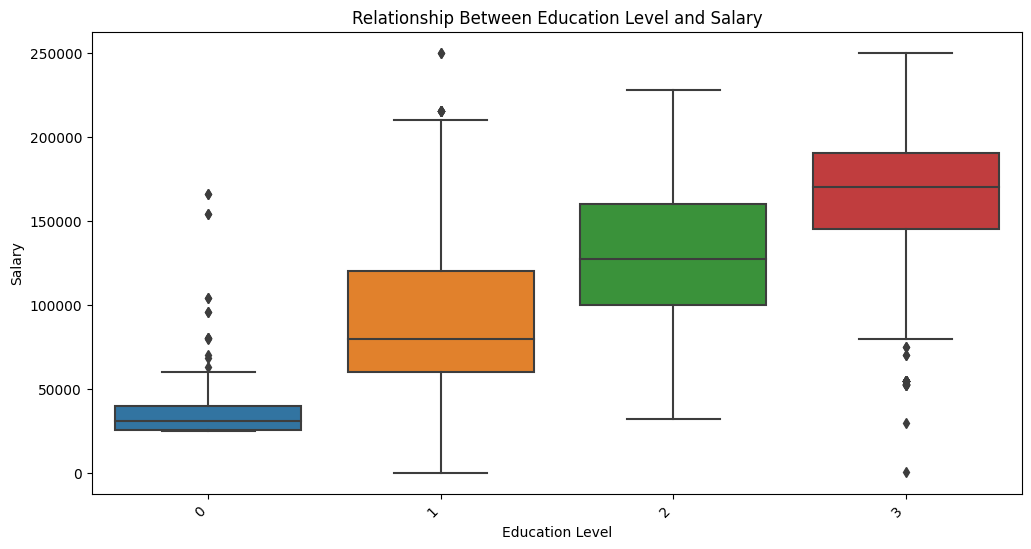

In [30]:
# Visualization - Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Relationship Between Education Level and Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

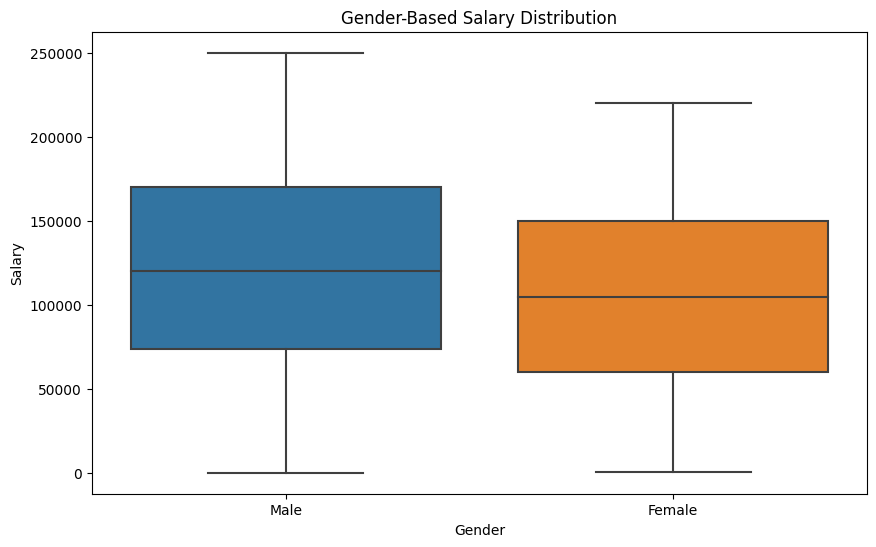

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Gender-Based Salary Distribution')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

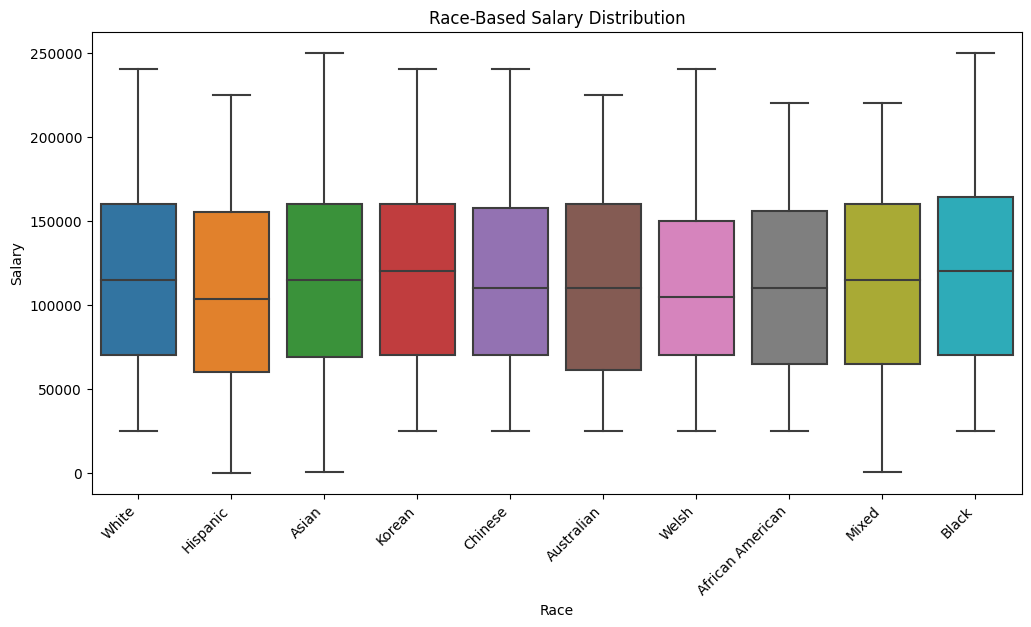

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Race', y='Salary', data=df)
plt.title('Race-Based Salary Distribution')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0, 0.5, 'Salary')

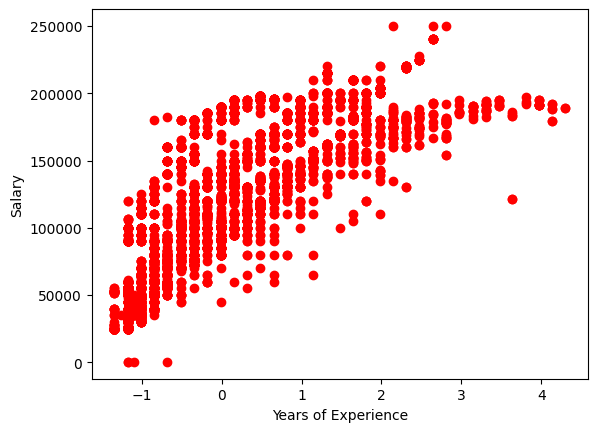

In [24]:
plt.scatter(df2["Years of Experience"], df2["Salary"], color = "red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

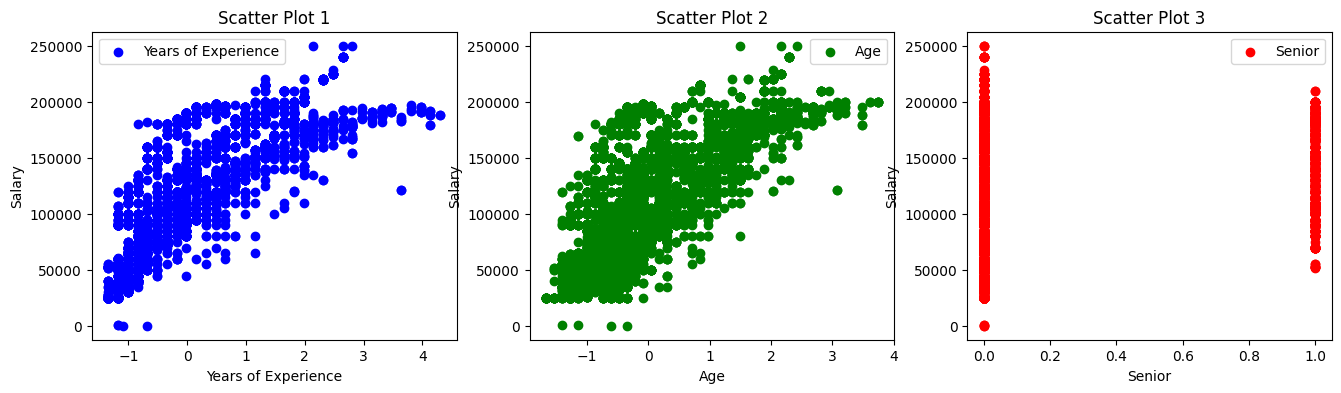

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Scatter plot 1
axs[0].scatter(df2["Years of Experience"], df2["Salary"], label='Years of Experience', color='b')

# Scatter plot 2
axs[1].scatter(df2["Age"], df2["Salary"],label='Age', color='g')

# Scatter plot 3
axs[2].scatter(df2["Senior"], df2["Salary"], label='Senior', color='r')


# Add labels and titles to each subplot
axs[0].set_xlabel('Years of Experience')
axs[0].set_ylabel('Salary')
axs[0].set_title('Scatter Plot 1')

axs[1].set_xlabel('Age')
axs[1].set_ylabel('Salary')
axs[1].set_title('Scatter Plot 2')

axs[2].set_xlabel('Senior')
axs[2].set_ylabel('Salary')
axs[2].set_title('Scatter Plot 3')

# Add legends
axs[0].legend()
axs[1].legend()
axs[2].legend()

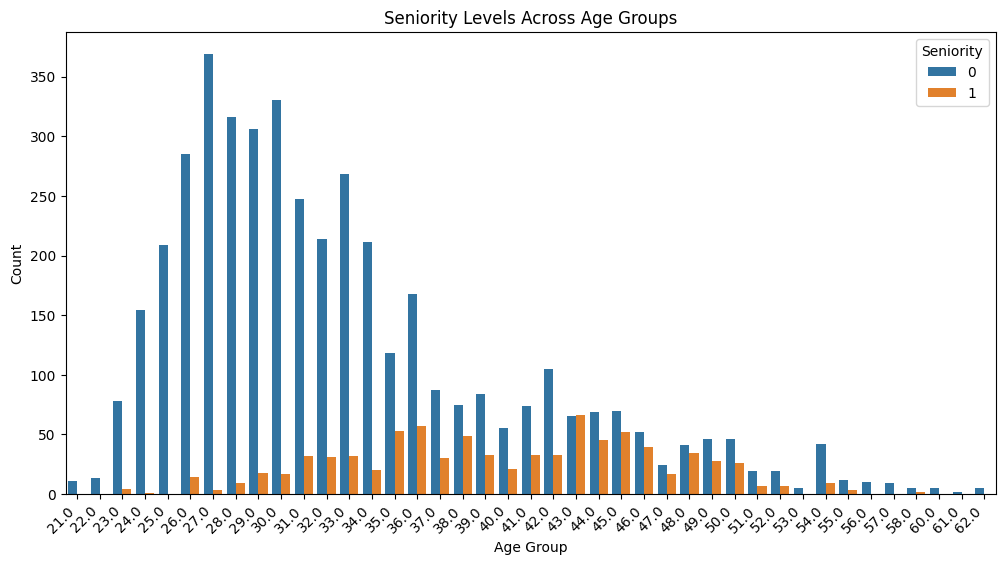

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Senior', data=df)
plt.title('Seniority Levels Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Seniority')
plt.xticks(rotation=45, ha='right')
plt.show()

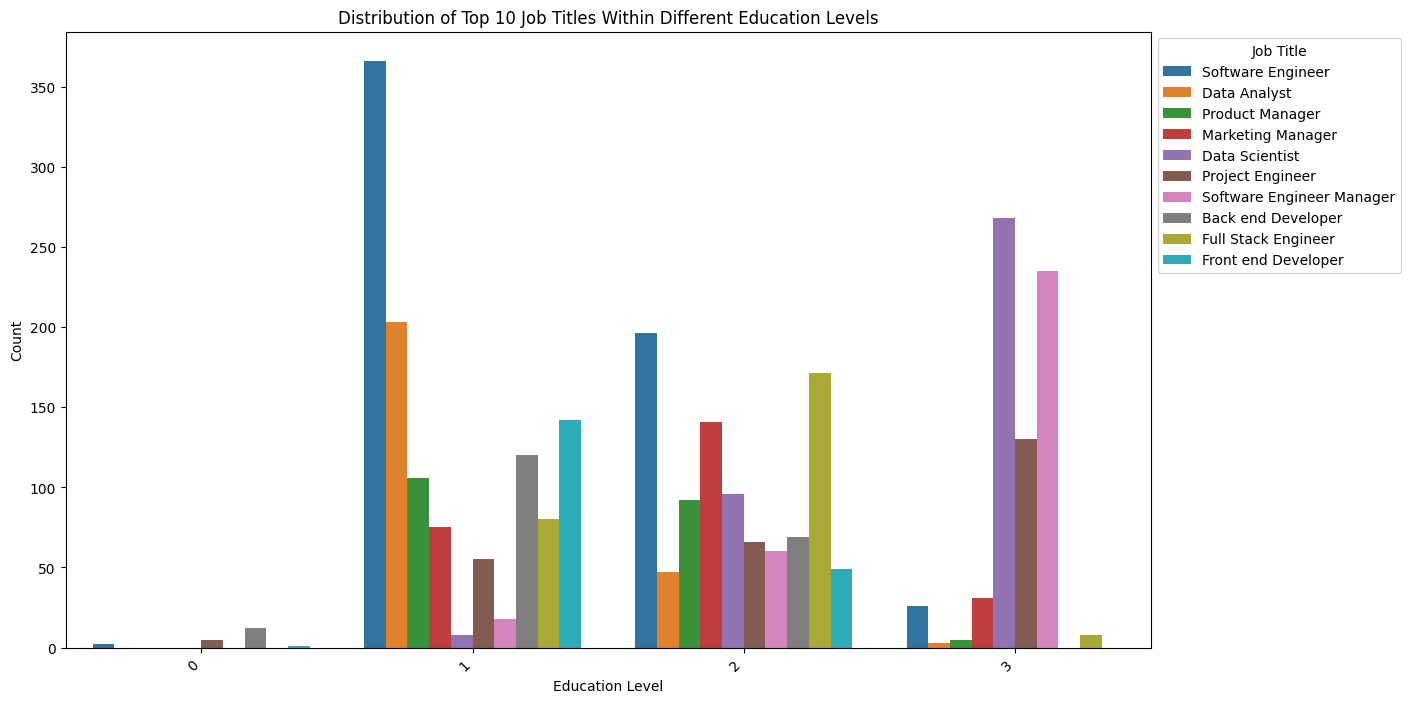

In [34]:
# Get the top 10 job titles
top_job_titles = df['Job Title'].value_counts().nlargest(10).index

# Filter the DataFrame for only the top 10 job titles
df_top_job_titles = df[df['Job Title'].isin(top_job_titles)]

# Visualization - Stacked bar chart
plt.figure(figsize=(14, 8))
sns.countplot(x='Education Level', hue='Job Title', data=df_top_job_titles)
plt.title('Distribution of Top 10 Job Titles Within Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Job Title', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()

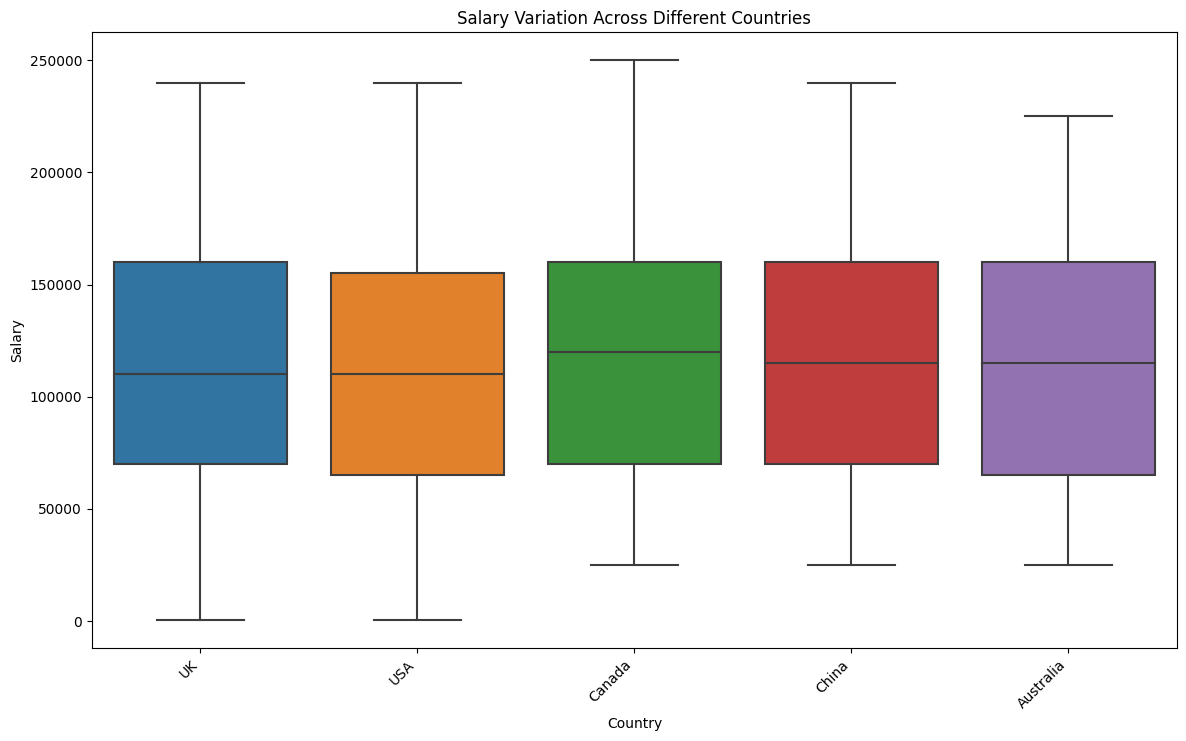

In [35]:
# Visualization - Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Salary', data=df)
plt.title('Salary Variation Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.show()